In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


from sklearn.preprocessing import StandardScaler

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
pima = pd.read_csv("./abcW_1.csv")
pima.head()

,MACD,MACD-C3,MA5,TS-9,TS-6,Corp 3,Corp2,MA10,Target - 1,Target - 0,Target - -1,Target,CLOSE,Date
0,1.11,2.11,5.2,0,0,-1,0,3.40,0,1,0,0,337.0,300
1,0.95,1.95,3.9,1,1,-1,1,2.20,0,1,0,0,339.0,299
2,0.28,1.28,2.6,1,1,-1,1,0.80,1,0,0,1,331.5,298
3,0.10,-0.90,1.3,1,1,1,0,0.65,1,0,0,1,319.0,297
4,0.37,-0.63,1.7,0,0,1,0,0.90,1,0,0,1,313.5,296


In [3]:
''' reverse the rows in pandas '''
reverse_stockseq = pima.iloc[::-1]
reverse_stockseq.head()

,MACD,MACD-C3,MA5,TS-9,TS-6,Corp 3,Corp2,MA10,Target - 1,Target - 0,Target - -1,Target,CLOSE,Date
299,0.11,-0.89,0.1,0,0,1,0,-0.25,0,1,0,0,263.5,1
298,0.21,-0.79,1.1,0,0,1,0,-0.10,0,1,0,0,263.5,2
297,0.11,1.11,1.8,0,0,-1,0,0.35,0,1,0,0,265.0,3
296,0.16,-0.84,1.4,-1,0,1,1,0.45,0,1,0,0,262.5,4
295,-0.04,0.96,0.5,0,0,-1,0,0.75,0,0,1,-1,263.0,5


In [4]:
X = reverse_stockseq.iloc[0:299, 0:8].values # Features
y = reverse_stockseq.iloc[0:299, 8:11].values  # Target variable

#Add new
X_train1=X
y_train1=y


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)

#X_test = sc.transform(X_test)



X_train=X_train1[50:299]
y_train=y_train1[50:299]

X_test=X_train1[0:50]
y_test=y_train1[0:50]

X_train1=X
y_train1=y

In [5]:
X_train1
y_train1

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0,

In [22]:
reverse_stockseq.describe()

,MACD,MACD-C3,MA5,TS-9,TS-6,Corp 3,Corp2,MA10,Target - 1,Target - 0,Target - -1,Target,CLOSE,Date
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.009033,0.019033,0.218333,0.053333,0.006667,-0.010000,0.053333,0.189667,0.263333,0.523333,0.213333,0.050000,252.140000,150.500000
std,0.302878,1.006708,1.614679,0.715679,0.600965,0.882703,0.756569,1.109978,0.441178,0.500290,0.410346,0.689748,27.862996,86.746758
min,-1.030000,-1.730000,-6.500000,-1.000000,-1.000000,-1.000000,-1.000000,-3.600000,0.000000,0.000000,0.000000,-1.000000,208.000000,1.000000
25%,-0.190000,-0.952500,-0.900000,0.000000,0.000000,-1.000000,-1.000000,-0.412500,0.000000,0.000000,0.000000,0.000000,231.000000,75.750000
50%,0.000000,-0.015000,0.400000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,1.000000,0.000000,0.000000,246.500000,150.500000
75%,0.230000,1.000000,1.400000,1.000000,0.000000,1.000000,1.000000,0.912500,1.000000,1.000000,0.000000,1.000000,264.000000,225.250000
max,1.110000,2.110000,5.200000,1.000000,1.000000,1.000000,1.000000,3.400000,1.000000,1.000000,1.000000,1.000000,339.000000,300.000000


In [6]:
close_array = reverse_stockseq['CLOSE'].values
close_array

array([263.5, 263.5, 265. , 262.5, 263. , 257.5, 260. , 254. , 250. ,
       243.5, 244. , 227.5, 237. , 230.5, 237. , 238.5, 236.5, 236. ,
       237. , 230. , 229.5, 219.5, 221. , 222.5, 223. , 234. , 235.5,
       236.5, 235. , 234.5, 234. , 236.5, 231. , 231.5, 227.5, 228.5,
       231. , 226. , 222. , 218. , 219. , 219. , 218.5, 223. , 224. ,
       226.5, 229. , 225.5, 235. , 234. , 226. , 220. , 221. , 219. ,
       222.5, 226.5, 226. , 222.5, 223.5, 222.5, 225.5, 221. , 223.5,
       221.5, 220. , 217.5, 216.5, 223. , 225.5, 219.5, 215.5, 208. ,
       213. , 211. , 215.5, 216. , 220.5, 218.5, 221. , 217.5, 220.5,
       218.5, 221. , 223. , 220.5, 222.5, 226. , 229. , 222.5, 221. ,
       228. , 230. , 229. , 227. , 227. , 230. , 229. , 234.5, 236.5,
       236.5, 238. , 239.5, 239. , 235.5, 233. , 234. , 234. , 230. ,
       230.5, 235.5, 237. , 234.5, 239. , 241. , 240.5, 242. , 245.5,
       248.5, 241.5, 244. , 241.5, 242. , 245.5, 245.5, 246. , 246.5,
       253. , 254. ,

In [7]:
print('Total number of days in the dataset: {}'.format(len(close_array)))

Total number of days in the dataset: 300


In [8]:
scaler = StandardScaler()
scaled_close_dataset = scaler.fit_transform(close_array.reshape(-1, 1))
scaled_close_dataset

array([[ 0.40839042],
       [ 0.40839042],
       [ 0.46231522],
       [ 0.37244056],
       [ 0.39041549],
       [ 0.19269126],
       [ 0.28256591],
       [ 0.06686674],
       [-0.0769327 ],
       [-0.3106068 ],
       [-0.29263187],
       [-0.88580458],
       [-0.5442809 ],
       [-0.777955  ],
       [-0.5442809 ],
       [-0.49035611],
       [-0.56225583],
       [-0.58023076],
       [-0.5442809 ],
       [-0.79592993],
       [-0.81390486],
       [-1.17340347],
       [-1.11947868],
       [-1.06555389],
       [-1.04757896],
       [-0.65213048],
       [-0.59820569],
       [-0.56225583],
       [-0.61618062],
       [-0.63415555],
       [-0.65213048],
       [-0.56225583],
       [-0.75998007],
       [-0.74200514],
       [-0.88580458],
       [-0.84985472],
       [-0.75998007],
       [-0.93972937],
       [-1.08352882],
       [-1.22732826],
       [-1.1913784 ],
       [-1.1913784 ],
       [-1.20935333],
       [-1.04757896],
       [-1.01162909],
       [-0

In [9]:
print("std: ",scaled_close_dataset.std())
print("mean: ", scaled_close_dataset.mean())

std:  0.9999999999999998
mean:  4.736951571734001e-16


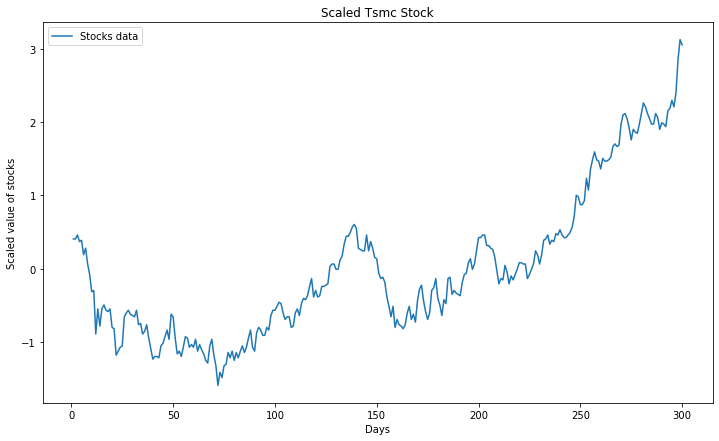

In [10]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled Tsmc Stock')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')

plt.plot(reverse_stockseq.Date, scaled_close_dataset, label='Stocks data')
plt.legend() #左上標示
plt.show()

In [11]:
#參數設定
learning_rate=0.001
batch_size=8  
epochs = 200
rnn_size=512
number_of_layers=1
number_of_classes=1
window_size=7  

In [12]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size]) # 前n筆資料訓練
        y.append(data[i+window_size])   # 最後一筆預測
        
        i += 1
    assert len(X) ==  len(y)  #做完所有資料return
    return X, y

In [13]:
X, y = window_data(scaled_close_dataset, window_size)  #切 X, y

In [14]:
import numpy as np
#將前250筆作為訓練資料，251~300作為測試資料
X_train  = np.array(X[0:250])
y_train = np.array(y[0:250])

X_test = np.array(X[250:])
y_test = np.array(y[250:])

#X shape (700, 7, 1) 700筆資料, 每一筆資料有七個close price
#y shape (700, 1) 700筆資料, 每一筆資料有一個close price
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (250, 7, 1)
y_train size: (250, 1)
X_test size: (43, 7, 1)
y_test size: (43, 1)


In [73]:
#rnn_size 是LSTM內neuron的數量
#若想堆疊堆多層LSTM使用tf.contrib.rnn.MultiRNNCell
#LSTM起始時init_state內沒有資料，先給初始值0

def get_RNN(rnn_size, keep_prob):
#BasicRNN_layer = tf.contrib.rnn.BasicLSTMCell(rnn_size)
    BasicRNN_layer = tf.nn.rnn_cell.BasicLSTMCell(rnn_size)
#RNN_layer = tf.contrib.rnn.DropoutWrapper(BasicRNN_layer, output_keep_prob=keep_prob)
    RNN_layer = tf.nn.rnn_cell.DropoutWrapper(BasicRNN_layer, output_keep_prob=keep_prob)
    return RNN_layer

def LSTM_cell(rnn_size, X, number_of_layers, keep_prob):    
    cell = tf.nn.rnn_cell.MultiRNNCell([get_RNN(rnn_size, keep_prob) for _ in range(number_of_layers)])
    init_state = cell.zero_state(tf.shape(X)[0], tf.float32)
    return cell, init_state

In [74]:
def output_layer(lstm_output, out_size):
    x = lstm_output[:, -1, :]   
    output = tf.layers.dense(inputs= x, units= out_size) 
    return output

In [75]:
# RNN及LSTM會有梯度爆炸的問題，因此若斜率超過+-5則clip到+-5之內
def opt_loss(logits, targets, learning_rate):
    
    loss = tf.reduce_mean(tf.pow(logits - targets, 2))
    
    #Cliping the gradient loss
    optimizer = tf.train.AdamOptimizer(learning_rate)
    gradients = optimizer.compute_gradients(loss)

    capped_gradients = [(tf.clip_by_value(grad, -5, 5), var) for grad, var in gradients if grad is not None]
    
    train_optimizer = optimizer.apply_gradients(capped_gradients)

    
    return loss, train_optimizer

In [76]:
main_graph = tf.Graph()
sess = tf.Session(graph=main_graph)

with main_graph.as_default():
    
    ##defining placeholders##
    with tf.name_scope('input'):
        inputs = tf.placeholder(tf.float32, [None, window_size, 1], name='input_data')
        targets = tf.placeholder(tf.float32, [None, 1], name='targets')
        keep_prob = tf.placeholder(tf.float32, name='keep_prob')
        
    ##LSTM layer##
    with tf.variable_scope("LSTM_layer"):
        cell, init_state = LSTM_cell(rnn_size, inputs, number_of_layers, keep_prob) 
        outputs, states = tf.nn.dynamic_rnn(cell, inputs, initial_state=init_state)
    
    ##Output layer##   
    with tf.variable_scope('output_layer'):
        logits = output_layer(outputs, number_of_classes)
    
    ##loss and optimization##
    with tf.name_scope('loss_and_opt'):
        loss, opt = opt_loss(logits, targets, learning_rate)
    
    init = tf.global_variables_initializer()

In [77]:
#### initialize model ####
sess.run(init)

In [78]:
for i in range(epochs):
    batch_index = 0
    epoch_loss = []
    while(batch_index + batch_size) <= len(X_train):
        X_batch = X_train[batch_index:batch_index+batch_size]
        y_batch = y_train[batch_index:batch_index+batch_size]
        batch_loss, _ = sess.run([loss, opt], feed_dict={inputs:X_batch, targets:y_batch, keep_prob: 0.8})
        epoch_loss.append(batch_loss)
        batch_index += batch_size
    if (i % 30) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/200  Current loss: 0.09857797622680664
Epoch 30/200  Current loss: 0.02209547348320484
Epoch 60/200  Current loss: 0.020915746688842773
Epoch 90/200  Current loss: 0.02187805436551571
Epoch 120/200  Current loss: 0.022237977012991905
Epoch 150/200  Current loss: 0.022179950028657913
Epoch 180/200  Current loss: 0.021426936611533165


In [79]:
#Training set預測結果
training_set_pred = np.array([])
for i in range(len(X_train)):
    o = sess.run(logits, feed_dict={inputs:[X_train[i]], keep_prob: 1.0})
    training_set_pred = np.append(training_set_pred, o)

In [80]:
training_set_pred 

array([ 0.22588706,  0.08985694, -0.15825233, -0.34045774, -0.32097328,
       -0.82797343, -0.67155159, -0.56884366, -0.59069538, -0.4199672 ,
       -0.53820157, -0.57117206, -0.49266556, -0.75987381, -0.81382072,
       -1.0485487 , -1.10152674, -0.91505778, -0.98094642, -0.60451967,
       -0.52854061, -0.55979627, -0.58764499, -0.60654008, -0.61622214,
       -0.52611595, -0.71491343, -0.73664373, -0.79660416, -0.82074296,
       -0.6888411 , -0.87906873, -1.06169164, -1.11613834, -1.10759294,
       -1.09318149, -1.12947488, -0.97267437, -0.93106985, -0.89270169,
       -0.77880865, -0.91299796, -0.59685206, -0.57775122, -0.95028859,
       -1.1289897 , -0.99281532, -1.09771013, -1.01421547, -0.81947803,
       -0.88404804, -1.03040874, -0.97192246, -0.98475456, -0.92060447,
       -1.03589559, -0.9948557 , -0.99754918, -1.11411297, -1.16470158,
       -1.18997347, -0.9792375 , -0.87870431, -1.13347578, -1.27155256,
       -1.44132221, -1.34840631, -1.31847894, -1.26748157, -1.17

In [81]:
#Testing set預測結果
testing_set_pred = np.array([])
for i in range(len(X_test)):
    o = sess.run(logits, feed_dict={inputs:[X_test[i]], keep_prob: 1.0})
    testing_set_pred = np.append(testing_set_pred, o)

In [86]:
#把資料放到list裡面準備畫圖
#因為我們是用前七天預測第8天股價，故前七天設為None
training = [None]*window_size
for i in range(len(X_train)):
    training.append(training_set_pred[i])
testing = [None] * (window_size + len(X_train))
testing_loss = 0
for i in range(len(X_test)):
    testing.append(testing_set_pred[i])
    testing_loss += (testing_set_pred[i] - y_test[i])**2
    training.append(None)
print('testing loss:', testing_loss / len(X_test))
#print("mae:  ", metrics.mean_absolute_error(training_set_pred ,testing_set_pred))


testing loss: [0.4094494]


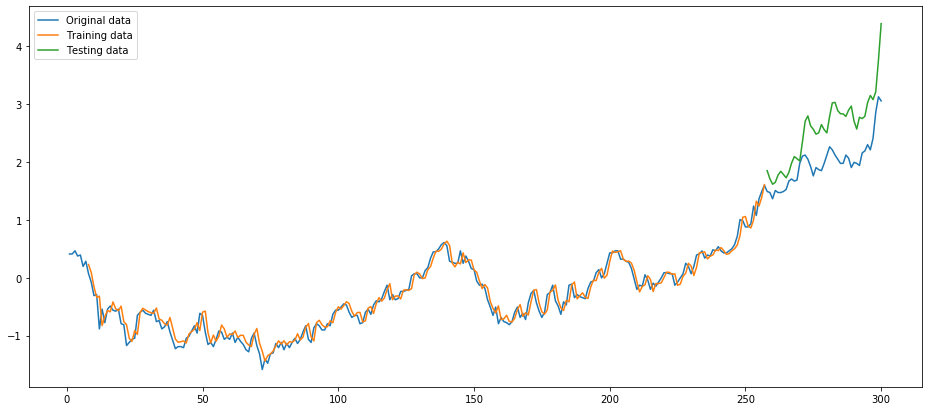

In [84]:
plt.figure(figsize=(16, 7))
plt.plot(reverse_stockseq.Date, scaled_close_dataset, label='Original data')
plt.plot(reverse_stockseq.Date, training, label='Training data')
plt.plot(reverse_stockseq.Date, testing, label='Testing data')
plt.legend()
plt.show()